In [11]:
from custom_utils import load_and_concatenate_parquet_files

df = load_and_concatenate_parquet_files('./data/preprocessed_df')
display(df)

,full_text,label,label_names
0,law enforcement on high alert following threat...,1,real
1,unbelievable obamas attorney general says most...,1,real
2,bobby jindal raised hindu uses story of christ...,0,fake
3,satan russia unvelis an image of its terrifyin...,1,real
4,about time christian group sues amazon and spl...,1,real
...,...,...,...
63074,wikileaks email shows clinton foundation funds...,1,real
63075,russians steal research on trump in hack of yo...,0,fake
63076,watch giuliani demands that democrats apologiz...,1,real
63077,migrants refuse to leave train at refugee camp...,0,fake


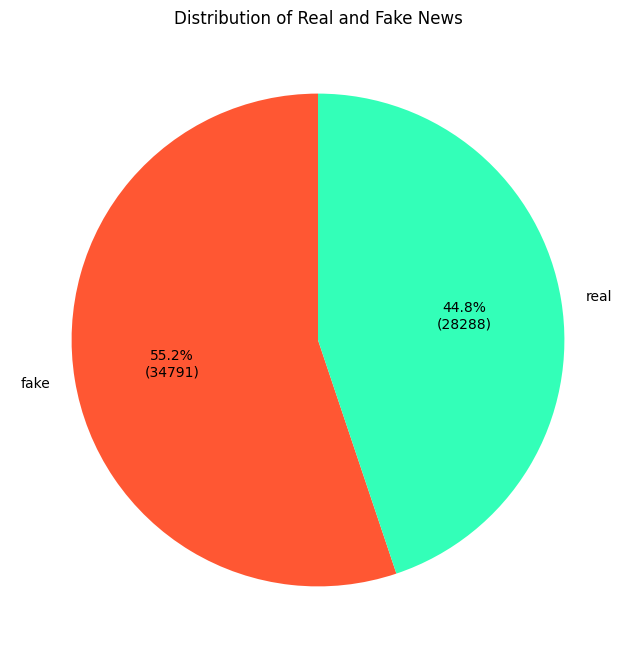

In [12]:
import matplotlib.pyplot as plt
label_counts = df['label_names'].value_counts()
plt.figure(figsize=(8, 8))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

plt.pie(label_counts, labels=label_counts.index, autopct=autopct_format(label_counts), startangle=90, colors=['#FF5733', '#33FFB8'])
plt.title('Distribution of Real and Fake News')
plt.show()

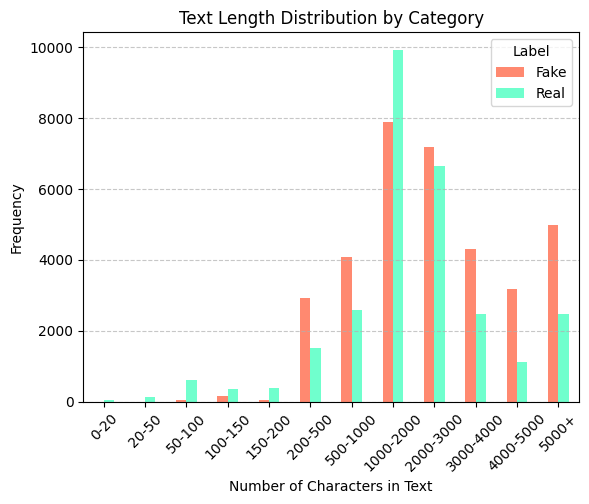

In [14]:
import matplotlib.pyplot as plt
import numpy as np

df["body_len"] = df["full_text"].apply(lambda x: len(x) - x.count(" "))

bins = [0, 20, 50, 100, 150, 200, 500, 1000, 2000, 3000, 4000, 5000]  

def classify_length(length):
    for i in range(len(bins) - 1):
        if bins[i] <= length < bins[i + 1]:
            return f"{bins[i]}-{bins[i + 1]}"
    if length >= bins[-1]:
        return f"{bins[-1]}+"
    return None

df["length_bin"] = df["body_len"].apply(classify_length)

bin_counts = df.groupby(['length_bin', 'label']).size().unstack(fill_value=0)

bin_order = ["0-20", "20-50", "50-100", "100-150", "150-200", "200-500", "500-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000+"]
bin_counts = bin_counts.reindex(bin_order)

bin_counts.plot(kind='bar', alpha=0.7, color=["#FF5733", "#33FFB8"])
plt.title('Text Length Distribution by Category')
plt.xlabel('Number of Characters in Text')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(["Fake", "Real"], title="Label")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

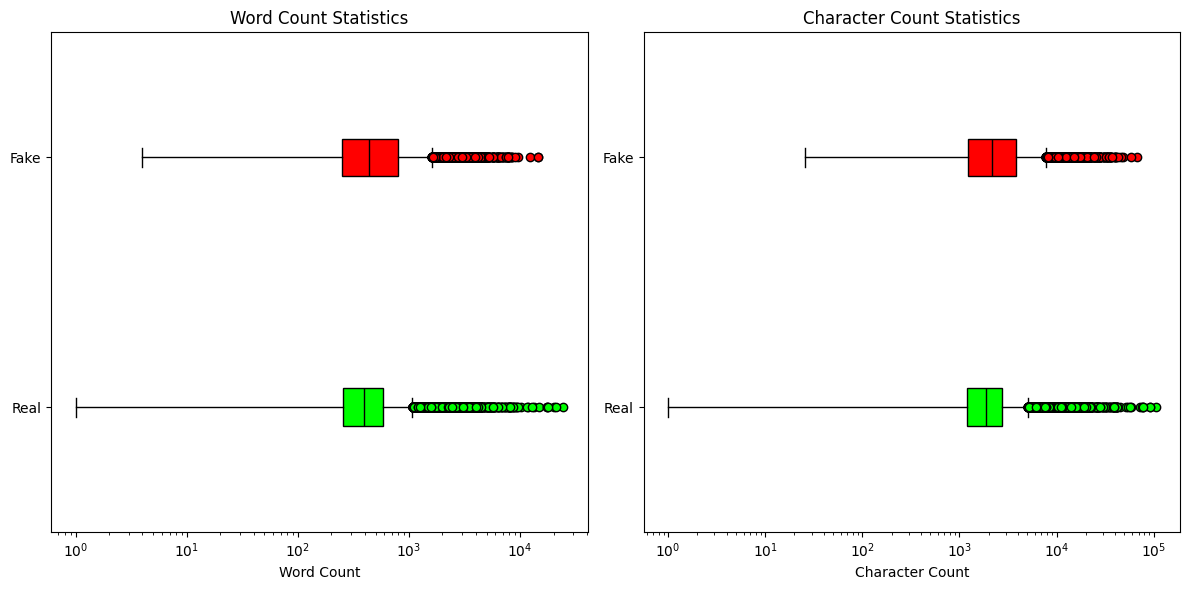

In [31]:
import pandas as pd
# Calculate word counts
df["word_count"] = df["full_text"].apply(lambda x: len(x.split()))

# Create figure
plt.figure(figsize=(12, 6))

# Word Count Statistics (left subplot)
plt.subplot(1, 2, 1)

# Real news boxplot
plt.boxplot(df[df["label_names"] == "real"]["word_count"],
            vert=False, 
            patch_artist=True, 
            positions=[1],
            tick_labels=["Real"],
            boxprops=dict(facecolor='lime', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='lime', markeredgecolor='black'))

# Fake news boxplot
plt.boxplot(df[df["label_names"] == "fake"]["word_count"],
            vert=False, 
            patch_artist=True, 
            positions=[2],
            tick_labels=["Fake"],
            boxprops=dict(facecolor='red', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', markeredgecolor='black'))

plt.xscale('log')
plt.title('Word Count Statistics')
plt.xlabel('Word Count')

# Character Count Statistics (right subplot)
plt.subplot(1, 2, 2)

# Real news boxplot
plt.boxplot(df[df["label_names"] == "real"]["body_len"],
            vert=False, 
            patch_artist=True, 
            positions=[1],
            tick_labels=["Real"],
            boxprops=dict(facecolor='lime', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='lime', markeredgecolor='black'))

# Fake news boxplot
plt.boxplot(df[df["label_names"] == "fake"]["body_len"],
            vert=False, 
            patch_artist=True, 
            positions=[2],
            tick_labels=["Fake"],
            boxprops=dict(facecolor='red', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', markeredgecolor='black'))

plt.xscale('log')
plt.title('Character Count Statistics')
plt.xlabel('Character Count')

plt.tight_layout()
plt.show()


In [32]:
# Calculate statistics for word counts by label
word_count_stats_real = df[df["label_names"] == "real"]["word_count"].describe()
word_count_stats_fake = df[df["label_names"] == "fake"]["word_count"].describe()

# Calculate statistics for character counts by label
char_count_stats_real = df[df["label_names"] == "real"]["body_len"].describe()
char_count_stats_fake = df[df["label_names"] == "fake"]["body_len"].describe()

word_count_df = pd.DataFrame({
    'Real News Word Count': word_count_stats_real,
    'Fake News Word Count': word_count_stats_fake
})

char_count_df = pd.DataFrame({
    'Real News Char Count': char_count_stats_real,
    'Fake News Char Count': char_count_stats_fake
})

# Combine the DataFrames side by side
combined_stats = pd.concat([word_count_df, char_count_df], axis=1)

# Round the numbers to 2 decimal places
combined_stats = combined_stats.round(2)

# Optionally, you can rename the index for better readability
combined_stats.index = ['Count', 'Mean', '25%', '50%', '75%', 'Max', 'Min', 'Std']

display(combined_stats)


,Real News Word Count,Fake News Word Count,Real News Char Count,Fake News Char Count
Count,28288.00,34791.00,28288.00,34791.00
Mean,523.21,584.92,2492.43,2850.73
25%,656.02,560.69,3097.65,2637.23
50%,1.00,4.00,1.00,26.00
75%,254.00,248.00,1203.75,1237.50
Max,397.00,436.00,1863.00,2186.00
Min,583.00,793.00,2760.00,3862.50
Std,24405.00,14501.00,104888.00,68007.00


In [ ]:
import pickle
from pathlib import Path
import numpy as np
from joblib import Parallel, delayed
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import gc
import h5py
from tqdm import tqdm
import json
import pandas as pd
import seaborn as sns
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
from pathlib import Path

class TextProcessor:
    def __init__(self, model_name="en_core_web_sm", n_jobs=4, chunk_size=100):
        self.model_name = model_name
        self.n_jobs = n_jobs
        self.chunk_size = chunk_size
        self.nlp = self._load_spacy()
        self.nlp.add_pipe('sentencizer')
        
    def _load_spacy(self):
        try:
            return spacy.load(self.model_name)
        except OSError:
            spacy.cli.download(self.model_name)
            return spacy.load(self.model_name)

    def _process_chunk(self, texts):
        """Process a single chunk of texts"""
        docs = list(self.nlp.pipe(texts, batch_size=20))
        
        # Extract relevant information and free memory
        chunk_data = {
            'dependencies': [[token.dep_ for token in doc if token.is_alpha] for doc in docs],
            'entities': [[{'text': ent.text, 'label': ent.label_} for ent in doc.ents] for doc in docs],
            'sentence_lengths': [[len(sent) for sent in doc.sents] for doc in docs]
        }
        
        del docs
        gc.collect()
        return chunk_data

    def process_texts(self, texts, output_dir='processed_data'):
        """Process texts in chunks and save results incrementally"""
        Path(output_dir).mkdir(exist_ok=True)
        
        # Initialize storage files
        with h5py.File(f'{output_dir}/sentence_lengths.h5', 'w') as f:
            sentence_lengths_dataset = f.create_dataset('lengths', (0,), maxshape=(None,), dtype='int32')
        
        dependencies_file = open(f'{output_dir}/dependencies.jsonl', 'w')
        entities_file = open(f'{output_dir}/entities.jsonl', 'w')
        
        total_chunks = len(texts) // self.chunk_size + (1 if len(texts) % self.chunk_size else 0)
        
        for i in tqdm(range(0, len(texts), self.chunk_size), desc="Processing texts"):
            chunk = texts[i:i + self.chunk_size]
            chunk_data = self._process_chunk(chunk)
            
            # Save dependencies
            for deps in chunk_data['dependencies']:
                dependencies_file.write(json.dumps(deps) + '\n')
            
            # Save entities
            for ents in chunk_data['entities']:
                entities_file.write(json.dumps(ents) + '\n')
            
            # Save sentence lengths
            with h5py.File(f'{output_dir}/sentence_lengths.h5', 'a') as f:
                dataset = f['lengths']
                lengths = [length for doc_lengths in chunk_data['sentence_lengths'] for length in doc_lengths]
                new_size = dataset.shape[0] + len(lengths)
                dataset.resize(new_size, axis=0)
                dataset[new_size - len(lengths):new_size] = lengths
            
            # Clear memory
            del chunk_data
            gc.collect()
        
        dependencies_file.close()
        entities_file.close()

    @staticmethod
    def load_processed_data(output_dir='processed_data'):
        """Generator function to load processed data in chunks"""
        # Load dependencies
        with open(f'{output_dir}/dependencies.jsonl', 'r') as f:
            for line in f:
                yield {'dependencies': json.loads(line)}
        
        # Load entities
        with open(f'{output_dir}/entities.jsonl', 'r') as f:
            for line in f:
                yield {'entities': json.loads(line)}
        
        # Load sentence lengths
        with h5py.File(f'{output_dir}/sentence_lengths.h5', 'r') as f:
            yield {'sentence_lengths': f['lengths'][:]}

def analyze_texts(output_dir='processed_data'):
    """Analyze processed data and return statistics"""
    dependency_counts = Counter()
    entity_counts = Counter()
    cooccurrences = Counter()
    sentence_lengths = []
    
    # Process dependencies
    print("Analyzing dependencies...")
    with open(f'{output_dir}/dependencies.jsonl', 'r') as f:
        for line in tqdm(f):
            deps = json.loads(line)
            dependency_counts.update(deps)
    
    # Process entities
    print("Analyzing entities...")
    with open(f'{output_dir}/entities.jsonl', 'r') as f:
        for line in tqdm(f):
            entities = json.loads(line)
            entity_counts.update(ent['label'] for ent in entities)
            
            # Process co-occurrences
            if len(entities) > 1:
                for e1, e2 in combinations([ent['text'] for ent in entities], 2):
                    cooccurrences[tuple(sorted([e1, e2]))] += 1
    
    # Load sentence lengths
    print("Loading sentence lengths...")
    with h5py.File(f'{output_dir}/sentence_lengths.h5', 'r') as f:
        sentence_lengths = f['lengths'][:]
    
    return {
        'dependency_counts': dependency_counts,
        'entity_counts': entity_counts,
        'cooccurrences': cooccurrences,
        'sentence_lengths': sentence_lengths
    }

# Visualization functions remain the same but use the analysis results
def plot_all_visualizations(analysis_results):
    plot_dependency_relations(analysis_results['dependency_counts'])
    plot_named_entities(analysis_results['entity_counts'])
    plot_entity_cooccurrences(analysis_results['cooccurrences'])
    plot_sentence_length_distribution(analysis_results['sentence_lengths'])

# Usage example:
def main():
    texts = df['full_text'].tolist()
    
    # Process texts if not already processed
    if not Path('processed_data').exists():
        processor = TextProcessor(n_jobs=4, chunk_size=100)
        processor.process_texts(texts)
    
    # Analyze and visualize
    analysis_results = analyze_texts()
    plot_all_visualizations(analysis_results)

if __name__ == "__main__":
    main()

Processing texts:  34%|███▍      | 214/631 [16:57<1:01:47,  8.89s/it]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f3d93c9d2d0>>
Traceback (most recent call last):
  File "/home/nikl/coding/fhdw/fakenews_detection/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [2]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from custom_utils import load_and_concatenate_parquet_files


# Function to generate and save wordclouds
def save_wordcloud_images_from_column(
    df, column, label_column=None, output_dir="wordclouds", topic_column=None
):
    """
    Generates and saves wordclouds based on the provided column in the dataset.
    
    Args:
        df (pd.DataFrame): Input dataset.
        column (str): The column containing the article text.
        label_column (str): Column indicating labels (e.g., fake/real news).
        output_dir (str): Directory to save the wordclouds.
        topic_column (str): Column indicating topics for optional topic-based filtering.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Fake news and real news subsets (if label_column is provided)
    if label_column:
        for label in df[label_column].unique():
            label_text = ' '.join(df[df[label_column] == label][column])
            label_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(label_text)
            label_name = "fake_news" if label == 0 else "real_news"
            plt.imshow(label_wordcloud, interpolation="bilinear")
            plt.axis("off")  # Turn off the axes
            plt.gca().patch.set_visible(False)  # Hide the patch
            plt.savefig(f'{output_dir}/{label_name}' + ".svg", dpi=700, format="svg", transparent=True, bbox_inches='tight', pad_inches=0)
            plt.close()

# Load your dataset
df = load_and_concatenate_parquet_files('./data/preprocessed_df')

# Call the function to save wordclouds
save_wordcloud_images_from_column(df, column="full_text", label_column="label")


: 

In [2]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from custom_utils import load_and_concatenate_parquet_files

def process_label_chunk(df_chunk, column, label_value, output_dir, chunk_size=1000):
    """
    Process a single label's text data in chunks
    """
    texts = []
    for start in range(0, len(df_chunk), chunk_size):
        end = start + chunk_size
        chunk_text = ' '.join(df_chunk[column].iloc[start:end])
        texts.append(chunk_text)
    
    # Join all chunks and create wordcloud
    combined_text = ' '.join(texts)
    label_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(combined_text)
    
    # Save the wordcloud
    label_name = "fake_news" if label_value == 0 else "real_news"
    plt.figure(figsize=(16, 8))
    plt.imshow(label_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.gca().patch.set_visible(False)
    plt.savefig(
        f'{output_dir}/{label_name}.svg',
        dpi=700,
        format="svg",
        transparent=True,
        bbox_inches='tight',
        pad_inches=0
    )
    plt.close()

def save_wordcloud_images_from_column(
    data_path, column, label_column, output_dir="wordclouds", chunk_size=10000
):
    """
    Generates and saves wordclouds by processing one label at a time
    """
    os.makedirs(output_dir, exist_ok=True)

    # Process each label separately
    for label_value in [0, 1]:  # Assuming binary labels (0 for fake, 1 for real)
        print(f"Processing label {label_value}...")
        
        # Read only the rows for current label
        df_filtered = pd.read_parquet(
            data_path,
            filters=[(label_column, '=', label_value)],
            columns=[column]
        )
        
        # Process the filtered dataframe
        process_label_chunk(df_filtered, column, label_value, output_dir, chunk_size)
        
        # Clear memory
        del df_filtered
        
if __name__ == "__main__":
    # Call the function to save wordclouds
    save_wordcloud_images_from_column(
        data_path='/home/nikl/coding/fhdw/fakenews_detection/data/preprocessed_df',
        column="full_text",
        label_column="label"
    )

Processing label 0...


: 